In [1]:
# test activated or not
def is_acti(acti_lst,cord):
    flag = 0
    for block in acti_lst:
        ac_y_cor = (block-1)//4
        ac_x_cor = (block-1)%4
        x_l = 1/6*(1+ac_x_cor)
        x_h = 1/6*(2+ac_x_cor)
        y_l = 1/6*(1+ac_y_cor)
        y_h = 1/6*(2+ac_y_cor)
        if cord[0] >= x_l and cord[0] <= x_h and cord[1] >= y_l and cord[1] <= y_h:
            flag = 1
    return flag

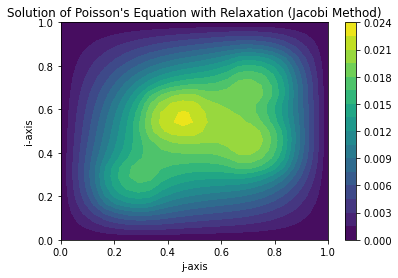

In [52]:
import numpy as np
import matplotlib.pyplot as plt

method = 'GS'
assert method == 'GS' or method == 'Jacobi'
# Grid parameters
N = 25-1  # Size of the grid (N-1 x N-1)
L = 1.0  # Length of the domain
dx = L / N  # Grid spacing
x = np.linspace(0, L, N + 1)  # x-coordinates
y = np.linspace(0, L, N + 1)  # y-coordinates
act_lst = [1,7,14,16]

# set f
f = np.zeros((N + 1, N + 1))
for i in range(0,N+1):
    for j in range(0,N+1):
        if is_acti(act_lst,(i*dx,j*dx)):
        #if i<2:
            f[i,j] = 1

# Initialize the grid and boundary conditions
u = np.zeros((N + 1, N + 1))
u_new = np.copy(u)
u[0, :] = 0.0  # Boundary condition: u(x, 0) = 0
u[-1, :] = 0.0  # Boundary condition: u(x, L) = 0
u[:, 0] = 0.0  # Boundary condition: u(0, y) = 0
u[:, -1] = 0.0  # Boundary condition: u(L, y) = 0

# Number of iterations
iterations = 300

# Relaxation parameter (omega)
omega = 1

# Jacobi iteration with relaxation
for _ in range(iterations):
    for i in range(1, N):
        for j in range(1, N):
            if method == 'Jacobi':
                u_new[i, j] = (1 - omega) * u[i, j] + (omega / 4) * (
                u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] + f[i,j]*(dx**2)) 
            if method == 'GS':
                u_new[i, j] = (1 - omega) * u[i, j] + (omega / 4) * (
                u[i + 1, j] + u_new[i - 1, j] + u[i, j + 1] + u_new[i, j - 1] + f[i,j]*(dx**2)) 
                
    u, u_new = u_new, u

# Plot the solution
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, u, levels=20, cmap='viridis')
plt.colorbar()
plt.title("Solution of Poisson's Equation with Relaxation (Jacobi Method)")
plt.xlabel("j-axis")
plt.ylabel("i-axis")
plt.show()


In [53]:
# Initialize arrays to store gradient values on each boundary
gradient_top = np.zeros(N + 1)
gradient_bottom = np.zeros(N + 1)
gradient_left = np.zeros(N + 1)
gradient_right = np.zeros(N + 1)


for i in range(N + 1):
    gradient_right[i] = -(3*u[i, -1] - 4 * u[i, -2] +  u[i, -3]) / (2 * dx)
    


for j in range(N + 1):
    gradient_top[j] =(3*u[-3, j] - 4 * u[-2, j] +  u[-1, j]) / (2 * dx)



for i in range(N + 1):
    gradient_left[i] = -(3 * u[i, 0] - 4 * u[i, 1] + u[i, 2]) / (2 * dx)


for j in range(N + 1):
    gradient_bottom[j] = -(3 * u[0, j] - 4 * u[1, j] + u[2, j]) / (2 * dx)




# Print the gradient values

print("\nGradient on the left boundary (j = 0):")
print(gradient_left)

print("\nGradient on the right boundary (j = L):")
print(gradient_right)


print("\nGradient on the bottom boundary (i = 0):")
print(gradient_bottom)

print("Gradient on the top boundary (i = L):")
print(gradient_top)



Gradient on the left boundary (j = 0):
[-0.          0.01218417  0.02426034  0.03587945  0.04632985  0.05488432
  0.06083544  0.06393579  0.0644587   0.06312989  0.0606809   0.05780875
  0.05482042  0.05172878  0.04842216  0.04478362  0.04074973  0.03632396
  0.03156206  0.02654637  0.02136069  0.01607405  0.01073474  0.00537173
 -0.        ]

Gradient on the right boundary (j = L):
[-0.          0.00710492  0.01438734  0.02201717  0.03013939  0.03882822
  0.04799486  0.05724959  0.06583454  0.07299798  0.07804144  0.08076095
  0.08149332  0.08100438  0.07994885  0.07868347  0.07682427  0.07368601
  0.06846581  0.06077975  0.05077159  0.03906413  0.02631866  0.01319513
 -0.        ]

Gradient on the bottom boundary (i = 0):
[-0.          0.01217454  0.02422181  0.03577382  0.04610126  0.05446274
  0.06014409  0.06290426  0.06304296  0.06133815  0.0586012   0.05562897
  0.05282854  0.05028221  0.047885    0.04544258  0.0427328   0.0395492
  0.03573479  0.03120595  0.02596157  0.0200756